COULD NOT LOAD RichDEM ENGINE! NOTHING WILL WORK!


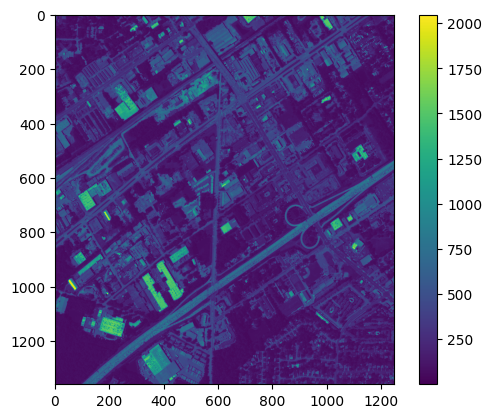

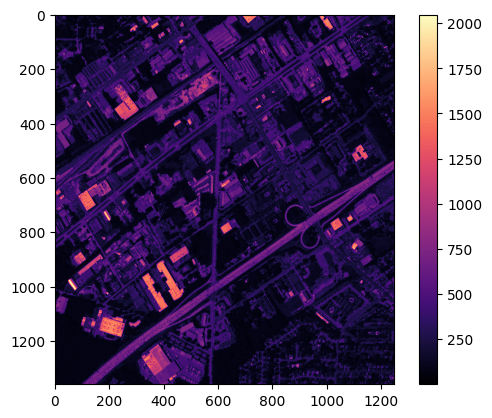

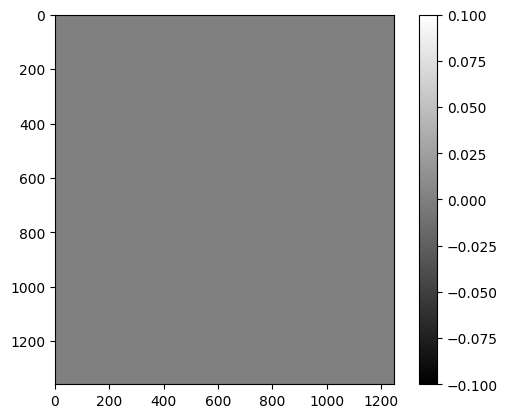

Exception: The source data did not have a NoData value. Please use the no_data argument to specify one. If should not be equal to any of the actual data values. If you are using all possible data values, then the situation is pretty hopeless - sorry.

In [1]:
#！/usr/bin/env python3
# -*- coding:utf-8 -*-

%matplotlib inline

import os
import subprocess
from osgeo import gdal
import matplotlib.pyplot as plt
import richdem as rd

#======================================1.计算坡度===============================
# 处理dem.tif生产坡度文件slope2.tif,采用python脚本中调用gdaldem可执行文件的形式
cmd='gdaldem slope Tile_+017_+010\Tile_+017_+010_dem.tif slope2.tif -compute_edges'
# 形式1
os.system(cmd)
# 形式2
# subprocess.call(cmd.split()))
#显示效果
slp2 = gdal.Open(r"D:\GoogleDownLoads\CasMVSNet_pl\gdal_study\RSP_testing_data\JAX_IMG1_MSI.TIF")  # gdal.Dataset

slp2Array=slp2.GetRasterBand(1).ReadAsArray()

plt.figure()
plt.imshow(slp2Array)
plt.colorbar()
plt.show()

#======================================2.计算坡向===============================
cmd='gdaldem aspect Tile_+017_+010\Tile_+017_+010_dem.tif aspect2.tif -compute_edges'
os.system(cmd)
# subprocess.call(cmd.split()))
aspect2 = gdal.Open(r"D:\GoogleDownLoads\CasMVSNet_pl\gdal_study\RSP_testing_data\JAX_IMG1_MSI.TIF")  # gdal.Dataset

aspect2Array=slp2.GetRasterBand(1).ReadAsArray()
plt.imshow(aspect2Array,cmap='magma')
plt.colorbar()
plt.show()
#======================================3.计算山体阴影===============================
# 采用技术路线3实现：gdal.DEMProcessing

dem = gdal.Open(r"D:\GoogleDownLoads\CasMVSNet_pl\gdal_study\RSP_testing_data\JAX_IMG1_MSI.TIF")  # gdal.Dataset

hill=gdal.DEMProcessing('hillshade.tif',dem,'hillshade',computeEdges=True)
hillshade=gdal.Open('hillshade.tif')
hillArray=hillshade.GetRasterBand(1).ReadAsArray()
plt.imshow(hillArray,cmap='gray')
plt.colorbar()
plt.show()



# using richdem

dem = rd.LoadGDAL(r"D:\GoogleDownLoads\CasMVSNet_pl\gdal_study\RSP_testing_data\JAX_IMG1_MSI.TIF")  # gdal.Dataset


slp3 = rd.TerrainAttribute(dem, attrib="slope_degrees") # replace "slope_degrees" with "slope_riserun",  "aspect" ...
rd.SaveGDAL("slope3.tif", slp3) 

visualize (example)
plt.figure()
plt.imshow(slp2Array)
plt.colorbar()
plt.show()


